<a href="https://colab.research.google.com/github/MartinGenao/CSC263-Web-Application/blob/main/FinalPresentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


**Team: Dennis Isn't Here**

> *Roles*:
*   Ralph -
*   Martin -
*   Dennis -

(5pts) Understand application domains involved and the knowledge that's required (The Challenge)

(20pts) Select a target data set or subset of samples on the discovery that is be performed

- which features are available in the dataset?
 - Prolactin, Progesterone, Cortisol Samples

- which features may contain errors or typos?
 - Many of elephants have missed samples so we have filled those with NaN

- which features contain blank, null or empty values?
 - Prolactin, Progesterone, Cortisol Samples
- what are the data types for various features?
 - all data types have been converted to floats and integers
(5pts) Get your assumptions based on data analysis

(20pts) Cleanse and preprocess data

- Simplify the data sets by removing unwanted attributes.
- Analyze useful features that can be used to represent the data, depending on the goal or task.
- Summary statistics
- Compute the covariance and correlation between pairs of attributes

(5pts) Match KDD goals with data mining methods to suggest hidden, or create new features.

(5pts) Search for patterns of interest in a particular representational form, which include
classification rules or trees
regression

(20pts) Create supervised learning models to identify the relationship between output and the features.

(20pts) Choose the appropriate evaluation metric and rank your evaluation of all the models to choose the model that best fits your project goal or task.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


We already have the overall mean of this data set but It was used to check the code to ensure accuracy -- Prolactin Hormone Data

In [ ]:
import pandas as pd

# Specify the path to your Excel file
excel_file_path = 'drive/MyDrive/Hormone.xlsx'

# List of sheet names you want to read
sheets_to_read = ['Prolactin', 'Cortisol', 'Progesterone']

# Read data from specific sheets
hormone_data = {sheet_name: pd.read_excel(excel_file_path, sheet_name) for sheet_name in sheets_to_read}

# Access data for a specific sheet, for example, 'Prolactin'
sheet1_data = hormone_data['Prolactin']

# Exclude the first column ('Sample #') and calculate the mean for each remaining column
column_means = sheet1_data.iloc[:, 1:].mean()

# Convert the output to a DataFrame
column_means_df = pd.DataFrame(column_means, columns=['Mean'])

# Display the DataFrame
print(column_means_df)


          Mean
179   5.785200
124  19.145600
157  38.603846
185   7.080000
144   4.755909
..         ...
220   5.058929
227   5.125517
410   8.518148
146  19.346667
145  26.778519

[94 rows x 1 columns]


Getting overall mean of Cortisol for each elephant and putting it into CleanedData.xlsx -- Cortisol Hormone Data

In [ ]:
import pandas as pd

# Specify the path to your Excel files
excel_file_path_hormone = 'drive/MyDrive/Hormone.xlsx'
excel_file_path_cleaned_data = 'drive/MyDrive/CleanedData.xlsx'

# List of sheet names you want to read from the hormone data
sheets_to_read_hormone = ['Cortisol']

# Read data from the 'Cortisol' sheet in the hormone data
with pd.ExcelFile(excel_file_path_hormone) as xls_hormone:
    hormone_data = {sheet_name: pd.read_excel(xls_hormone, sheet_name) for sheet_name in sheets_to_read_hormone}

# Access data for the 'Cortisol' sheet
cortisol_data = hormone_data['Cortisol']

# Exclude the first column ('Sample #') and calculate the mean for each remaining column
column_means = cortisol_data.iloc[:, 1:].mean()

# Convert the output to a DataFrame
column_means_df = pd.DataFrame(column_means, columns=['Mean'])

# Read data from the 'CleanedData.xlsx' sheet
cleaned_data = pd.read_excel(excel_file_path_cleaned_data)

# Cleans 'Age' values to whole numbers
cleaned_data['Age'] = cleaned_data['Age'].astype(int)

# Create a new column 'Cortisol Overall Mean (ng/ml)' in the 'CleanedData.xlsx' sheet
cleaned_data['Cortisol Overall Mean (ng/ml)'] = column_means_df.mean

# Save the updated 'CleanedData' DataFrame to the 'CleanedData.xlsx' file
cleaned_data.to_excel(excel_file_path_cleaned_data, index=False)

print(column_means_df)


          Mean
179  22.608000
124  15.744000
157  10.023077
185  11.615385
144  15.627273
..         ...
220  18.579310
227  20.351724
410  18.355556
146  19.885185
145  16.485185

[94 rows x 1 columns]


Getting overall mean of Progesterone for each elephant and putting it into CleanedData.xlsx -- Progesterone Hormone Data

---



In [ ]:
import pandas as pd

# Specify the path to your Excel files
excel_file_path_hormone = 'drive/MyDrive/Hormone.xlsx'
excel_file_path_cleaned_data = 'drive/MyDrive/CleanedData.xlsx'

# List of sheet names you want to read from the hormone data
sheets_to_read_hormone = ['Progesterone']

# Read data from the 'Progesterone' sheet in the hormone data
with pd.ExcelFile(excel_file_path_hormone) as xls_hormone:
    hormone_data = {sheet_name: pd.read_excel(xls_hormone, sheet_name) for sheet_name in sheets_to_read_hormone}

# Access data for the 'Progesterone' sheet
progesterone_data = hormone_data['Progesterone']

# Exclude the first column ('Sample #') and calculate the mean for each remaining column
column_means = progesterone_data.iloc[:, 1:].mean()

# Convert the output to a DataFrame
column_means_df = pd.DataFrame(column_means, columns=['Mean'])

# Read data from the 'CleanedData.xlsx' sheet
cleaned_data = pd.read_excel(excel_file_path_cleaned_data)

# Create a new column 'Progesterone Overall Mean (ng/ml)' in the 'CleanedData.xlsx' sheet
cleaned_data['Progesterone Overall Mean (ng/ml)'] = column_means.mean()

# Save the updated 'CleanedData' DataFrame to the 'CleanedData.xlsx' file
cleaned_data.to_excel(excel_file_path_cleaned_data, index=False)

# Print the updated DataFrame
print(column_means_df)


         Mean
179  0.142800
124  0.061600
157  0.101154
185  0.291538
144  0.299545
..        ...
227  0.143793
410  0.249630
146  0.073704
145  0.071852
238       NaN

[95 rows x 1 columns]


Animial.xlsx cleaning into a new Sheet called CleanedData.xlsx

In [ ]:
import pandas as pd

# Specify the path to your Excel file
excel_file_path = 'drive/MyDrive/Animal.xlsx'

# Read data from specific sheets
with pd.ExcelFile(excel_file_path) as xls:
    animal_list_data = pd.read_excel(xls, sheet_name='Animal List')
    working_data = pd.read_excel(xls, sheet_name='Working Data')

# Check if required columns exist in each sheet
required_columns_animal_list = ['Study ID', 'Zoo', 'Studbook ID']
required_columns_working_data = ['Cyclicity Status ','Lifetime ExpB Rate','Prolactin Overall Mean (ng/ml)','Age']

missing_columns_animal_list = set(required_columns_animal_list) - set(animal_list_data.columns)
missing_columns_working_data = set(required_columns_working_data) - set(working_data.columns)

if missing_columns_animal_list or missing_columns_working_data:
    print(f"Missing columns in 'Animal List' sheet: {missing_columns_animal_list}")
    print(f"Missing columns in 'Working Data' sheet: {missing_columns_working_data}")
else:
    try:
        # Merge tables to get the desired information
        merged_data = pd.merge(animal_list_data, working_data, left_on='Studbook ID', right_on='Studbook ID', how='inner')

        # Round 'Age' column to the nearest whole number
        merged_data['Age'] = merged_data['Age'].round().astype(int)

        # Filter columns for the final result
        result = merged_data[['Study ID','Studbook ID', 'Cyclicity Status ','Prolactin Overall Mean (ng/ml)', 'Lifetime ExpB Rate','Age']]  # Adjust column name with space

        # Save the result to a new Excel file called 'CleanedData.xlsx'
        result.to_excel('drive/MyDrive/CleanedData.xlsx', index=False)

        # Print the result
        print(result)

    except KeyError as e:
        print(f"KeyError: {e}. Make sure 'Study ID', 'Zoo', 'Studbook ID', and 'Cyclicity Status ' are present in the sheets.")


    Study ID  Studbook ID Cyclicity Status   Prolactin Overall Mean (ng/ml)  \
0   0A6BA77F          179                Ir                            5.79   
1   CA9A329B          124                 N                           19.15   
2   D852ED84          157                 N                           38.60   
3   579D062B          185                 Y                            6.68   
4   754DFE12          144                 Y                            4.69   
..       ...          ...               ...                             ...   
90  29B8B05A          220                 N                            5.06   
91  7E2D923B          227                Ir                            5.13   
92  B18345C3          410                Ir                            7.25   
93  1DF9DD37          146                 N                           19.35   
94  D3CE134C          145                 N                           27.46   

    Lifetime ExpB Rate  Age  
0             0.02864

/usr/local/lib/python3.10/dist-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Conditional Formatting extension is not supported and will be removed
  warn(msg)


LinearRegression Model - Trained on 20 rows, then tested on the rest

    Studbook ID  Lifetime ExpB Rate  Predicted Lifetime ExpB Rate
0           179            0.028640                      0.000000
1           124            0.000000                      0.024798
2           157            0.000000                      0.051663
3           185            0.000000                      0.000000
4           144            0.000000                      0.000000
..          ...                 ...                           ...
90          220            0.000000                      0.122391
91          227            0.000000                      0.000000
92          410            0.000000                      0.000000
93          146            0.055683                      0.064023
94          145            0.055683                      0.058816

[95 rows x 3 columns]


NameError: ignored

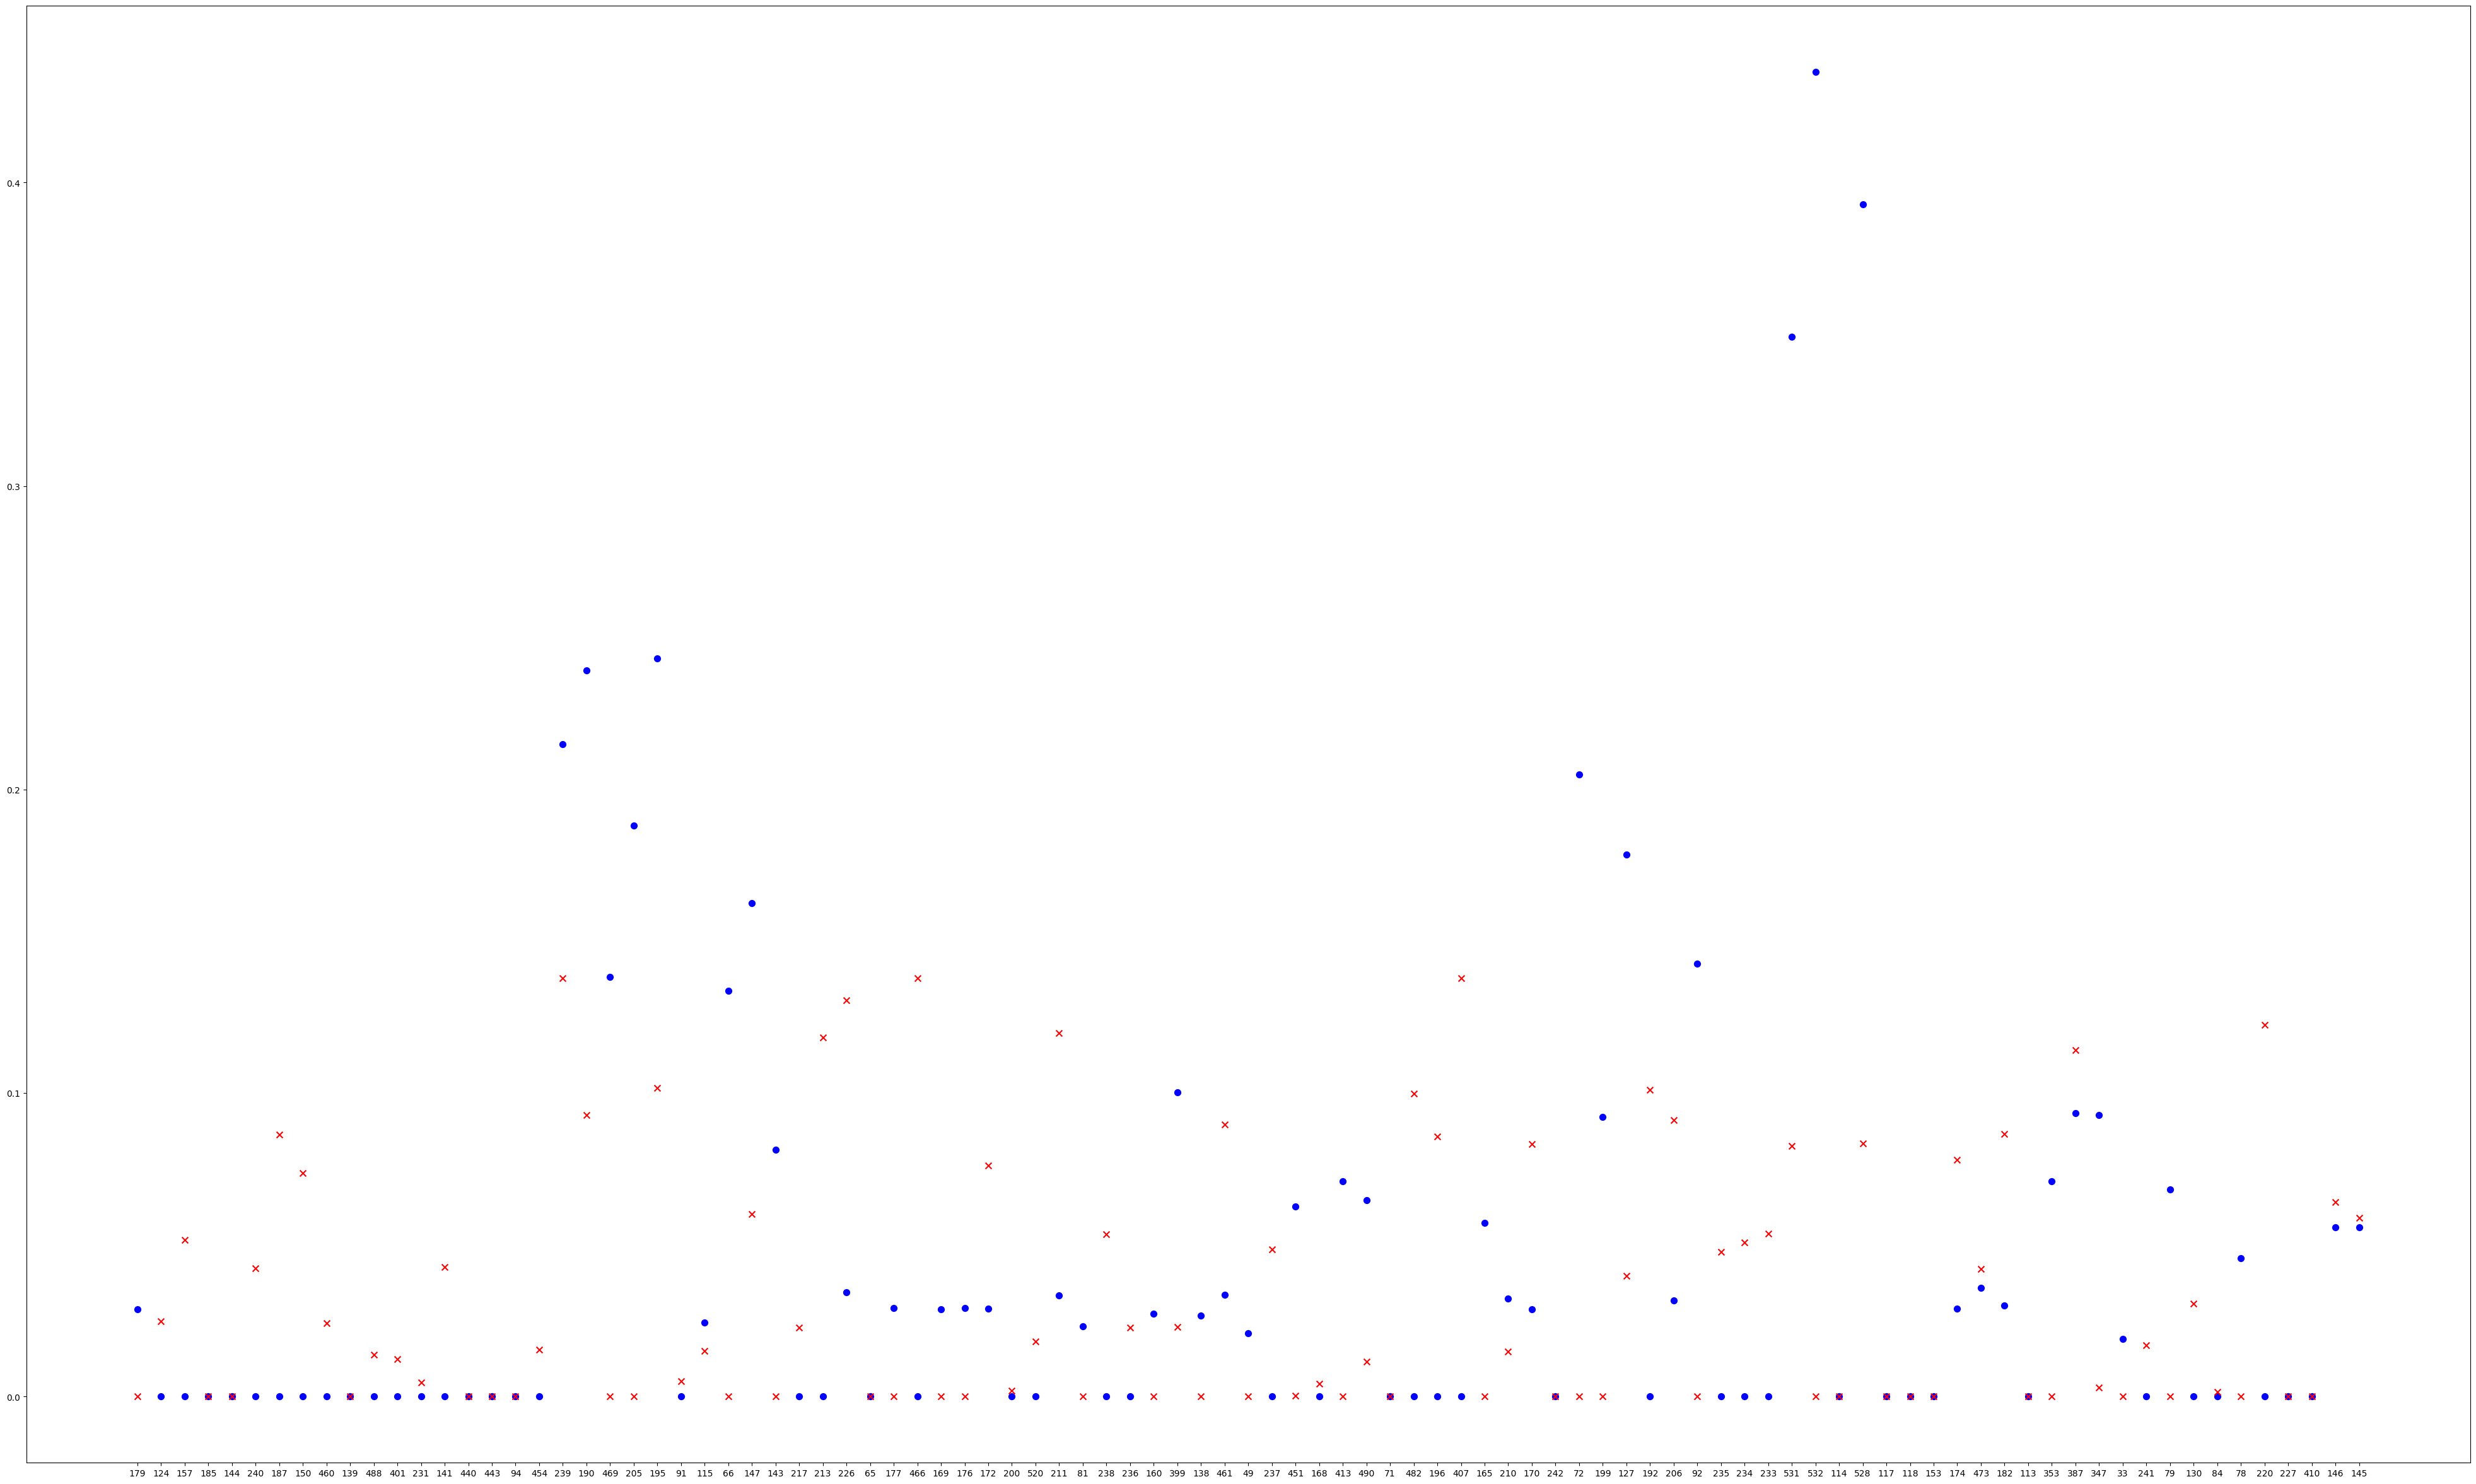

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Specify the path to your Excel file
excel_file_path = 'drive/MyDrive/CleanedData.xlsx'

# Read data from the 'CleanedData.xlsx' sheet
cleaned_data_df = pd.read_excel(excel_file_path)

# Convert 'Cyclicity Status ' to integers
cleaned_data_df['Cyclicity Status '] = cleaned_data_df['Cyclicity Status '].map({'Y': 1, 'N': 0, 'Ir': 2})

# Fill NaN values in 'Prolactin Overall Mean (ng/ml)' with its mean
cleaned_data_df['Prolactin Overall Mean (ng/ml)'].fillna(cleaned_data_df['Prolactin Overall Mean (ng/ml)'].mean(), inplace=True)

# Fill NaN values in other columns as needed
# For example, if you want to fill NaN in 'Lifetime ExpB Rate' with its mean:
cleaned_data_df['Lifetime ExpB Rate'].fillna(cleaned_data_df['Lifetime ExpB Rate'].mean(), inplace=True)

# Specify features and target variable
features = ['Cyclicity Status ', 'Prolactin Overall Mean (ng/ml)', 'Age']
target = 'Lifetime ExpB Rate'  # Assuming 'Lifetime ExpB Rate' is the target variable

# Drop rows with NaN in the target variable
cleaned_data_df = cleaned_data_df.dropna(subset=[target])

# Use the first 20 rows for training
subset_size = 20
subset_df = cleaned_data_df.head(subset_size)

# Split the subset data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(subset_df[features], subset_df[target], test_size=0.2, random_state=42)

# Initialize the Linear Regression model
model = LinearRegression()

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the entire dataset
cleaned_data_df['Predicted Lifetime ExpB Rate'] = model.predict(cleaned_data_df[features])

# Print the results for the entire dataset
cleaned_data_df['Predicted Lifetime ExpB Rate'] = cleaned_data_df['Predicted Lifetime ExpB Rate'].apply(lambda x: x if x >= 0 else 0)
print(cleaned_data_df[['Studbook ID', 'Lifetime ExpB Rate', 'Predicted Lifetime ExpB Rate']])

# Plotting Birth Rate vs. Predicted Birth Rate with labels
plt.figure(figsize=(50, 30))  # Adjust the figure size as needed

# Actual Birth Rate
plt.scatter(cleaned_data_df['Studbook ID'].astype(str), cleaned_data_df['Lifetime ExpB Rate'], label='Actual Birth Rate', marker='o', color='blue', s=50)

# Predicted Birth Rate
plt.scatter(cleaned_data_df['Studbook ID'].astype(str), cleaned_data_df['Predicted Lifetime ExpB Rate'], label='Predicted Birth Rate', marker='x', color='red', s=50)

# Separation
ax.axvline(x=max(cleaned_data_df['Studbook ID'].astype(str)), color='black', linestyle='--', linewidth=2)

plt.xlabel('Studbook ID')
plt.ylabel('Lifetime ExpB Rate')
plt.legend()
plt.title('Actual vs. Predicted Birth Rate')
plt.grid(True)  # Add a grid for better readability
plt.show()

# Print summary statistics
print("Summary Statistics:")
print(cleaned_data_df.describe())

# Compute covariance matrix
covariance_matrix = cleaned_data_df[features].cov()
print("\nCovariance Matrix:")
print(covariance_matrix)

# Compute correlation matrix
correlation_matrix = cleaned_data_df[features].corr()
print("\nCorrelation Matrix:")
print(correlation_matrix)